In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv('1.0-Mysterious_Dataset.csv')

In [4]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,Class
0,31.50,0.503125,385.729463,862.517300,19596.002818,31277209.6,32,6,5.4180,163866.7,...,4.832555,74.152888,2251.925605,2.351508,325.689642,8.684381,1.081518e+07,9.495276,2.302030,0
1,28.35,1.323355,1014.571860,2268.651647,43889.271330,45271741.2,78,2,5.8282,163866.7,...,24.154070,220.822250,1843.471057,2.406117,442.937368,7.052282,1.081602e+07,1364.952673,2.812086,0
2,29.40,0.958686,734.992339,1643.492834,27474.236445,49809995.2,86,2,7.1288,163866.7,...,6.277404,561.305017,1233.606098,1.997208,167.056643,5.149634,1.081429e+07,726.345137,4.202314,1
3,28.95,1.100718,843.884116,1886.982249,74636.479980,26022382.4,60,2,4.2616,163866.7,...,13.960635,236.308992,3523.114449,1.650823,954.294527,14.089407,1.081264e+07,713.193041,1.471425,0
4,30.90,0.604890,463.748815,1036.973874,41335.555368,43654998.8,30,6,5.1870,163866.7,...,25.374330,616.578268,2182.597755,1.531425,303.404781,9.717681,1.081367e+07,687.947098,2.375151,1


In [5]:
df.tail()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,Class
3745,28.20,1.385722,1062.387159,2375.569905,52653.882822,31233456.80,68,3,9.8840,163866.700000,...,1.460190,211.760805,658.467260,1.237443,200.854858,3.509177,1.081570e+07,1061.421598,7.872829,1
3746,26.25,2.521600,1933.226825,4322.826596,98956.645605,11958471.00,78,2,5.1786,163866.700000,...,49.248193,122.688526,1988.413640,1.643972,865.666760,8.810592,1.081423e+07,480.581215,2.607103,0
3747,34.20,0.219622,168.377018,376.502457,17801.455928,48139022.40,24,7,6.5142,163866.700000,...,2.604441,7.450176,1500.427134,2.275632,393.996802,5.867821,1.081551e+07,1599.897911,3.455016,0
3748,31.65,0.480481,368.368777,823.697627,49595.980118,5453951.65,40,7,4.5556,163866.700000,...,24.143691,330.518087,3119.030430,2.113610,67.549315,12.060769,1.081548e+07,1712.171286,1.662055,1
3749,36.15,0.120691,92.530053,206.903489,46032.677653,10277663.90,20,10,4.1972,163822.433333,...,20.708050,517.261220,3924.381729,2.214752,458.804207,14.447117,1.081222e+07,14.297707,1.320972,0


In [6]:
df.shape

(3750, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   3750 non-null   float64
 1   feature2   3750 non-null   float64
 2   feature3   3750 non-null   float64
 3   feature4   3750 non-null   float64
 4   feature5   3750 non-null   float64
 5   feature6   3750 non-null   float64
 6   feature7   3750 non-null   int64  
 7   feature8   3750 non-null   int64  
 8   feature9   3750 non-null   float64
 9   feature10  3750 non-null   float64
 10  feature11  3750 non-null   float64
 11  feature12  3750 non-null   float64
 12  feature13  3750 non-null   float64
 13  feature14  3750 non-null   float64
 14  feature15  3750 non-null   float64
 15  feature16  3750 non-null   float64
 16  feature17  3750 non-null   float64
 17  feature18  3750 non-null   float64
 18  feature19  3750 non-null   float64
 19  feature20  3750 non-null   float64
 20  feature2

In [9]:
df.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
Class        0
dtype: int64

In [10]:
# Assuming the last column is the target variable and others are features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [11]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Initialize classifiers
classifiers = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC()
}

In [14]:
# Train classifiers and evaluate performance
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    results[name] = {'Accuracy': acc, 'Confusion Matrix': cm, 'Classification Report': cr}

for name, metrics in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("\n")

Classifier: K-Nearest Neighbors
Accuracy: 0.8533333333333334
Confusion Matrix:
[[593  25]
 [ 85  47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       618
           1       0.65      0.36      0.46       132

    accuracy                           0.85       750
   macro avg       0.76      0.66      0.69       750
weighted avg       0.84      0.85      0.84       750



Classifier: Logistic Regression
Accuracy: 0.844
Confusion Matrix:
[[594  24]
 [ 93  39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       618
           1       0.62      0.30      0.40       132

    accuracy                           0.84       750
   macro avg       0.74      0.63      0.66       750
weighted avg       0.82      0.84      0.82       750



Classifier: Decision Tree
Accuracy: 0.884
Confusion Matrix:
[[576  42]
 [ 45  87]]
Classification Report:

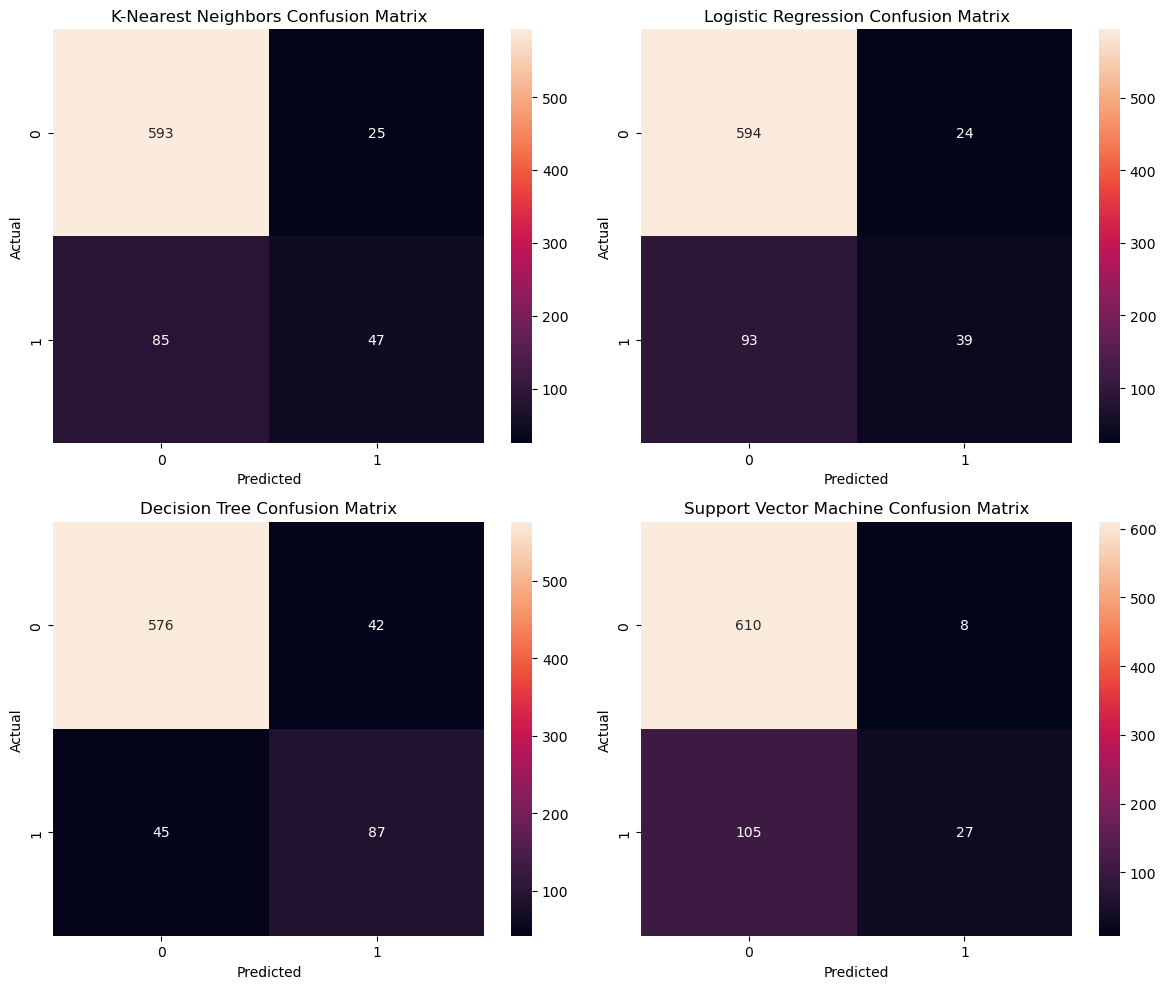

In [15]:
# Plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
for i, (name, metrics) in enumerate(results.items()):
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', ax=axes[i])
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
plt.tight_layout()
plt.show()